In [472]:
import numpy as np
import copy
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.linalg import svdvals
from scipy.linalg import svd

# 연습문제 3.2

In [99]:
#연습문제 3.2
    
def clgs(A):
    m,n = A.shape
    V = copy.deepcopy(A)
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i],A[:,j])
            V[:,j] = V[:,j]-R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j],2)
        Q[:,j] = V[:,j]/R[j,j]
    return Q,R
    
    
def mgs(A):
    m,n = A.shape
    Q = copy.deepcopy(A)
    R = np.zeros((n,n))
    for i in range(n-1):
        R[i,i] = np.linalg.norm(Q[:,i],2)
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:] = np.dot(Q[:,i].reshape(1,m),Q[:,i+1:])
        Q[:,i+1:] = Q[:,i+1:] - np.dot(Q[:,i].reshape(m,1),R[i,i+1:n].reshape(1,-1))
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1],2)
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q,R

    
def qrhouse(A):
    m,n = A.shape
    R = copy.deepcopy(A)
    V = np.zeros((m,n))
    for k in range(min(m-1,n)):
        x = R[k:,k].reshape(-1,1)
        v = x + np.sign(x[0])*np.linalg.norm(x,2)*np.eye(len(x),1)
        V[k:,k] = v.reshape(-1)
        R[k:,k:] = R[k:,k:]-\
        np.dot((2*v).reshape(-1,1), np.dot(v.reshape(1,-1),R[k:,k:])/(np.dot(v.T,v)))
    R = np.triu(R[:n,:n])
    return V,R
    
    

def formQ(V):
    m,n = V.shape
    Q = np.eye(m)
    for j in range(min(m-1,n))[::-1]:
        v = V[:,j]
        Q = Q-np.dot((2*v).reshape(-1,1), np.dot(v.reshape(1,-1),Q)/np.dot(v,v))
    return Q
    

In [473]:
#[(a)]
U, X = np.linalg.qr(np.random.randn(80,80))
V, X = np.linalg.qr(np.random.randn(80,80))
J = np.array(range(1,81))
S = np.diag([2.**(-x) for x in J])
A = np.dot(np.dot(U,S),V)
Qc,Rc = clgs(A)
Qm,Rm = mgs(A)

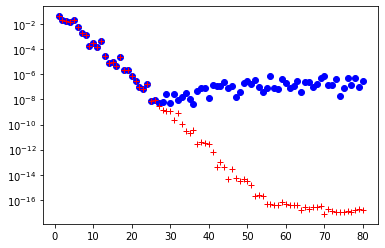

In [474]:
plt.semilogy(range(1,81),[Rc[j,j] for j in range(80)],'o',color='blue')
plt.semilogy(range(1,81),[Rm[j,j] for j in range(80)],'+',color='red')
# 아래의 그림에서 알 수 있듯이 빨간색의 modified가 수치적으로 더 안정하다.

In [475]:
#[(b)]
A = np.array([[.70000, .70711],[.70001, .70711]])
Qm, Rm = mgs(A)
V,R = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.dot(Q.T,Q)-np.eye(2)))
print(np.linalg.norm(np.dot(Qm.T,Qm)-np.eye(2)))
# 아래 결과를 보면 알 수 있듯, qrhouse로 구한 Q를 이용하는 것이 수치적으로 더 안정하다.

5.787252299533512e-16
3.254726094493924e-11


# 연습문제 3.3

In [476]:
#연습문제 3.3
def givensrotation(x1, x2):
    if x2 == 0:
        c = 1
        s = 0
    else:
        r = np.sqrt(x1**2 + x2**2) # r은 x1와 x2를 밑변으로 하는 직각삼각형의 빗변 길이
        c = x1/r # c는 cos
        s = x2/r # s는 sin
    return c,s
        

def reduced_givens_QR(A):
    m,n = A.shape
    # m>=n인 경우
    Q = np.eye(m)
    R = copy.deepcopy(A)
    
    for j in range(n):
        for i in range(j+1,m)[::-1]:
            G = np.eye(m)
            c, s = givensrotation(R[i-1,j], R[i,j])
            G[i-1:i+1,i-1:i+1] = np.array([[c,s],[-s,c]])
            Q = np.dot(Q,G.T)
            R = np.dot(G,R)
#             R = np.dot(G.T, R)
#             Q = np.dot(Q,G)
#             print(R)
    return Q[:,:n],R[:n,:]

In [621]:
A = np.random.randn(4,3)

In [622]:
reduced_givens_QR(A)

(array([[-0.69785093,  0.43039127, -0.26201692],
        [ 0.07473982, -0.33320082, -0.93486789],
        [-0.01543967,  0.69368187, -0.176005  ],
        [ 0.71216547,  0.47174785, -0.16245431]]),
 array([[ 3.43736046e+00,  8.59651643e-01, -4.82651973e-02],
        [-1.22434196e-17,  2.56281941e+00, -4.06949149e-01],
        [ 3.53226792e-17,  8.28170028e-17,  1.77867417e+00]]))

In [623]:
# built-in 코드
np.linalg.qr(A)

(array([[-0.69785093,  0.43039127, -0.26201692],
        [ 0.07473982, -0.33320082, -0.93486789],
        [-0.01543967,  0.69368187, -0.176005  ],
        [ 0.71216547,  0.47174785, -0.16245431]]),
 array([[ 3.43736046,  0.85965164, -0.0482652 ],
        [ 0.        ,  2.56281941, -0.40694915],
        [ 0.        ,  0.        ,  1.77867417]]))

In [ ]:
# 위의 결과를 보면 아주 작은 오차를 제외하면 구현한 것과 builtin 코드가 같은
# 결과를 반환한다는 것을 알 수 있다.

# 연습문제 4.3

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:47<00:00, 20.95s/it]


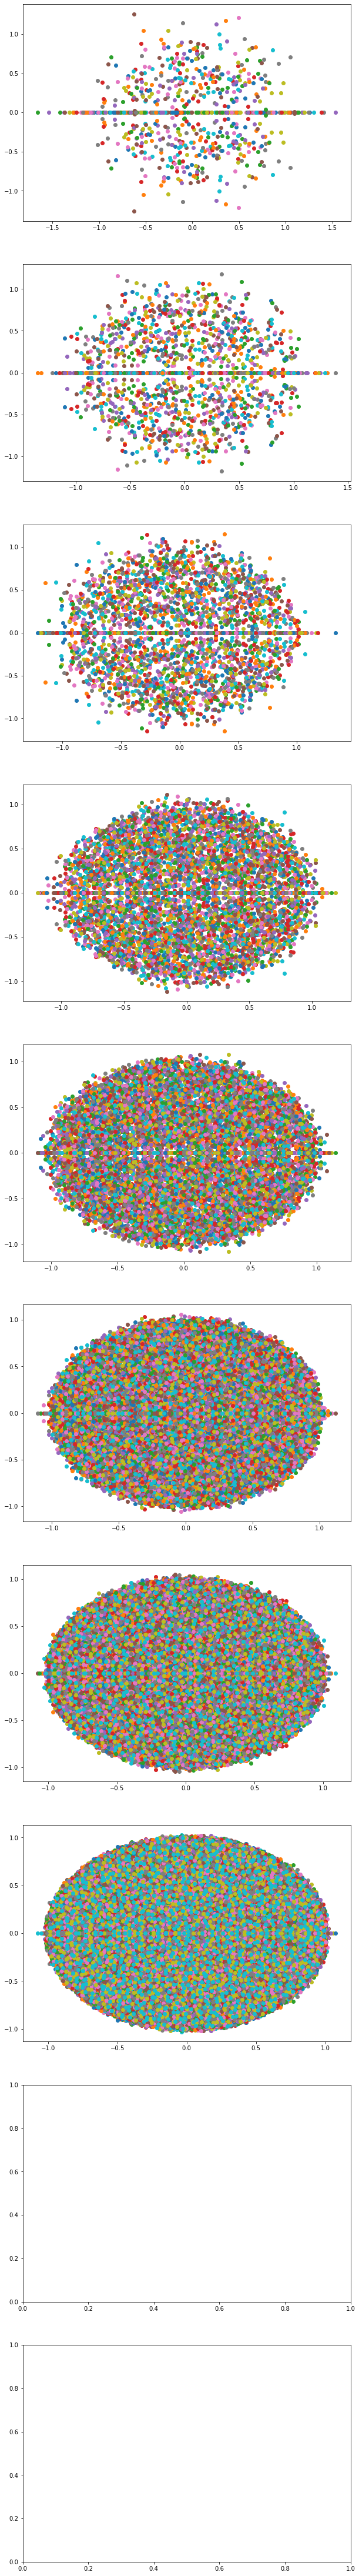

In [625]:
# 연습문제 4.3

# [(a)]
m_list = [8*(2**i) for i in range(8)]
f, axes = plt.subplots(10,1, figsize=(10,10*8))
spectral_radius_lists = []
ix = 0

for m in tqdm(m_list):
    spectral_radius_list = []
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        eigvals = np.linalg.eigvals(A)
        X = [x.real for x in eigvals]
        Y = [x.imag for x in eigvals]
        spectral_radius_list.append(max(np.abs(eigvals)))
        axes[ix].scatter(X,Y)
    spectral_radius_lists.append(spectral_radius_list)
    ix += 1
# 아래의 그림은 위에서부터 각각 m=8, 16, 32, ~~~ , 8*(2**7)일 때,
# 100개의 m by m random matrix의 eigenvalue들을 하나의 복소평면위에 그린 것이다.
# 그림을 보면 알 수 있듯, m이 커질수록 점점 반지름이 1인 원 안에 eigenvalue들이
# 위치하게끔 된다는 걸 알 수 있다.

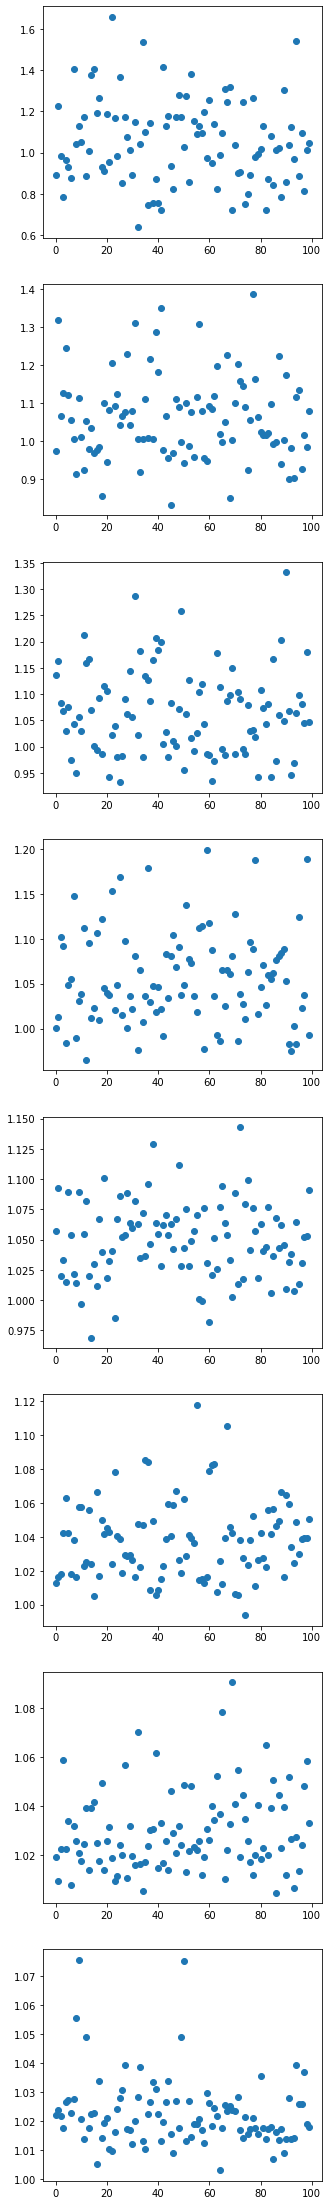

In [627]:
f, axes = plt.subplots(8,1, figsize=(5,5*8))
for i in range(len(spectral_radius_lists)):
    axes[i].plot(range(100), spectral_radius_lists[i],'o')
# 아래의 그림은 위에서부터 각각 m=8, 16, 32, ~~~ , 8*(2**7)일 때,
# 위에서 사용한 100개의 m by m random matrix에 대해서 
# m개의 eigenvalue들 중 절대값이 가장 큰
# eigenvalue들을 모아놓은 리스트를 2차원 그래프에 나타낸 것이다.
# x축은 그냥 100개의 행렬 중 n번째 행렬이라는 걸 나타내는 것뿐이고
# y축이 n번째 행렬의 가장 큰 eigenvalue로 spectral radius가 된다.
# 그림을 보면 알 수 있듯, m이 커질수록 spectral radius가 점점 1에 수렴할 거라는
# 가정을 세워볼 수 있을 것이다.

In [628]:
# [(b)]
m_list = [8*(2**i) for i in range(8)]
norm_lists = []
spectral_radius_lists = []
for m in tqdm(m_list):
    norm_list = []
    spectral_radius_list = []
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        eigvals = np.linalg.eigvals(A)       
        spectral_radius_list.append(max(np.abs(eigvals)))
        norm_list.append(np.linalg.norm(A,2))
    norm_lists.append(norm_list)
    spectral_radius_lists.append(spectral_radius_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [04:46<00:00, 35.80s/it]


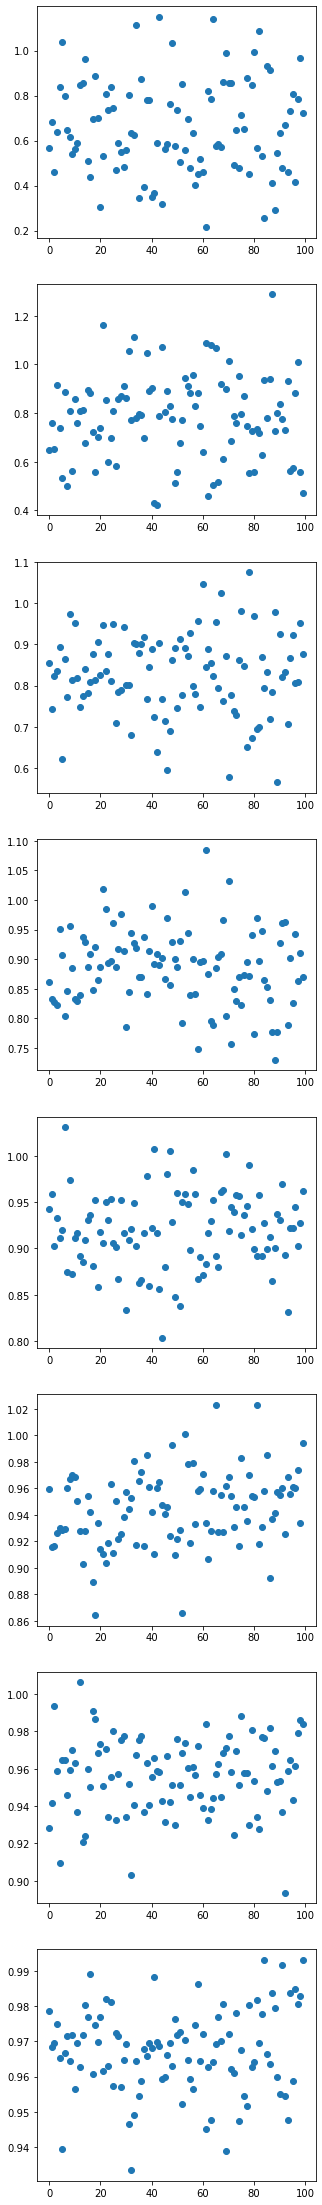

In [629]:
f, axes = plt.subplots(8,1, figsize=(5,5*8))
for i in range(len(norm_lists)):
    norm_list = norm_lists[i]
    spectral_radius_list = spectral_radius_lists[i]
    norm_minus_radius_list = [norm_list[j]-spectral_radius_list[j] for j in range(100)]
    axes[i].plot(range(100), norm_minus_radius_list,'o')
# 아래의 그림은 위에서부터 m=8, 16, 32, ~~~ , 8*(2**7)일 때,
# 100개의 m by m random matrix의 2-norm과 spectral radius의 차이를 2차원 플롯에
# 나타낸 것이다.
# 그림에서 알 수 있듯 m이 커지더라도 (norm - spectral radius) 값은 0에 
# 가까워지는 것처럼 보이지 않으므로
# inequality가 equality로 approach하지 않을 것이라 생각해볼 수 있다.

In [630]:
#[(c)]
m_list = [8*(2**i) for i in range(8)]
min_sv_lists = []
for m in tqdm(m_list):
    min_sv_list = []
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        min_sv = min(svdvals(A))
        min_sv_list.append(min_sv)
    min_sv_lists.append(min_sv_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:39<00:00, 12.46s/it]


In [631]:
def get_proportion_below_val(val_list, criteria):
    # criteria 값 이하인 val_list의 원소 갯수의 비율을 반환
    total_num = len(val_list)
    count = 0
    for val in val_list:
        if val<=criteria:
            count += 1
    return count/total_num

proportion_lists = []
for i in range(len(min_sv_lists)):
    m = 8*(2**i)
    criteria_list = [2**(-j) for j in range(1,15)]
    min_sv_list = min_sv_lists[i]
    proportion_list = []
    for criteria in criteria_list:
        proportion = get_proportion_below_val(min_sv_list, criteria)
        proportion_list.append(proportion)
        print('proportion of min singular value below {} of {} by {} matrix : {}'.\
             format(criteria, m, m, proportion))
    proportion_lists.append(proportion_list)
    print('-'*50)

proportion of min singular value below 0.5 of 8 by 8 matrix : 1.0
proportion of min singular value below 0.25 of 8 by 8 matrix : 0.98
proportion of min singular value below 0.125 of 8 by 8 matrix : 0.72
proportion of min singular value below 0.0625 of 8 by 8 matrix : 0.36
proportion of min singular value below 0.03125 of 8 by 8 matrix : 0.14
proportion of min singular value below 0.015625 of 8 by 8 matrix : 0.05
proportion of min singular value below 0.0078125 of 8 by 8 matrix : 0.03
proportion of min singular value below 0.00390625 of 8 by 8 matrix : 0.03
proportion of min singular value below 0.001953125 of 8 by 8 matrix : 0.0
proportion of min singular value below 0.0009765625 of 8 by 8 matrix : 0.0
proportion of min singular value below 0.00048828125 of 8 by 8 matrix : 0.0
proportion of min singular value below 0.000244140625 of 8 by 8 matrix : 0.0
proportion of min singular value below 0.0001220703125 of 8 by 8 matrix : 0.0
proportion of min singular value below 6.103515625e-05 of

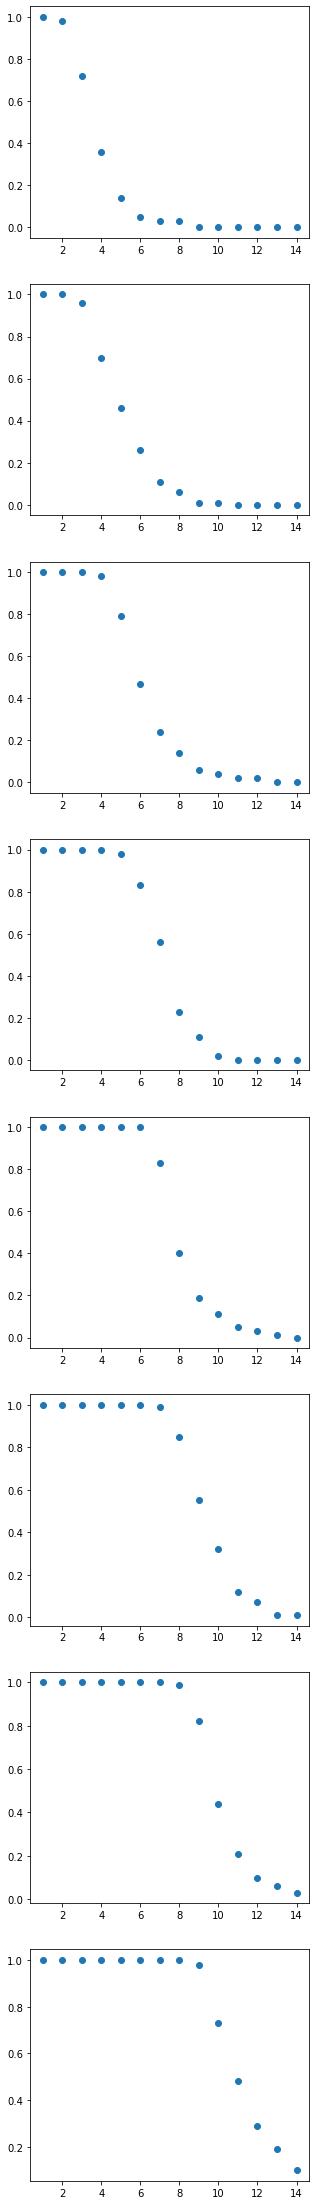

In [632]:
f, axes = plt.subplots(8,1, figsize=(5,8*5))
for i in range(len(proportion_lists)):
    axes[i].plot(range(1,15), proportion_lists[i],'o')
# 아래의 그림은 위에서부터 m=8, 16, 32, ~~~ , 8*(2**7)일 때,
# 100개의 m by m random matrix의 smallest singular value들 중
# 1/2, 1/4, 1/8. ~~~, 1/(2**14) 보다 작은 singular value의 비율을 나타낸 것이다.
# x축이 1/(2**n)에서 n을 의미하고
# y축이 그 비율을 나타낸다.

# 위 코드블럭의 프린트문 결과&아래의 플롯 결과를 통해 알 수 있듯이
# m by m matrix에서 m이 고정되어 있을 때에
# 1/(2**n) 이하의 minimum singular value의 비율은
# n이 커질수록 감소하는 걸 관찰할 수 있다.

# 또한 m by m matrix에서 m이 증가할수록
# 같은 n에 대해서 1/(2**n) 이하의 minimum value의 비율은
# 증가한다는 가정을 세울 수 있을 것이다.

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:11<00:00,  1.42s/it]


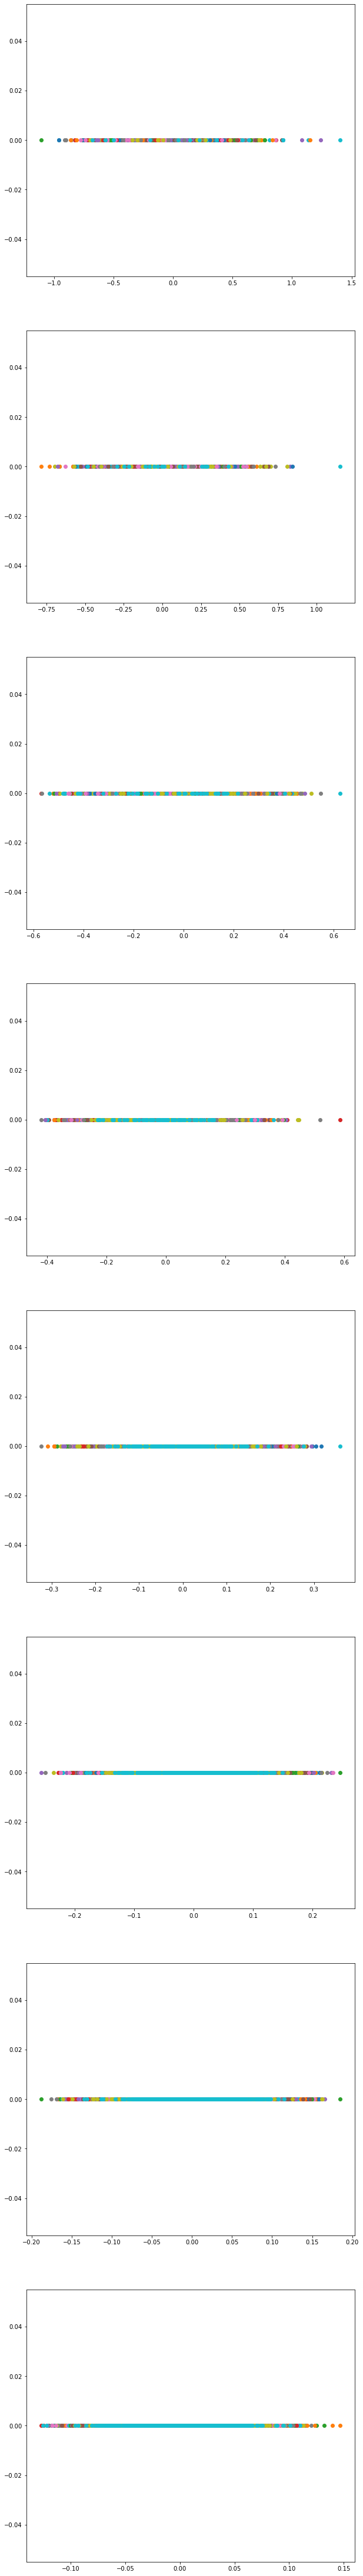

In [633]:
#[(d)]
# 이거는 위의 코드에서 A = np.random.randn(m,m)/np.sqrt(m) 부분을
# A = np.triu(np.random.randn(m,m)/np.sqrt(m)) 로 바꿔서 똑같이 실행하면 된다.

#[(d-a)]
m_list = [8*(2**i) for i in range(8)]
f, axes = plt.subplots(8,1, figsize=(10,10*8))
spectral_radius_lists = []
ix = 0
for m in tqdm(m_list):
    spectral_radius_list = []
    for j in range(100):
        A = np.triu(np.random.randn(m,m)/np.sqrt(m))
        eigvals = np.linalg.eigvals(A)
        X = [x.real for x in eigvals]
        Y = [x.imag for x in eigvals]
        spectral_radius_list.append(max(np.abs(eigvals)))
        axes[ix].scatter(X,Y)
    spectral_radius_lists.append(spectral_radius_list)
    ix += 1

# 플롯의 순서는 위와 똑같으므로 위에서부터 m=8, 16, 32, ~~~ , 8*(2**7)일 때,
# 플롯의 순서와 x축 y축의 내용은 위에서의 내용과 완전히 같으므로
# 아래에서 이와 관련된 설명은 생략한다.

# 플롯을 보면 알 수 있듯, 먼저 eigenvalue들이 다 실수라는 것을 먼저 관찰할 수 있다.

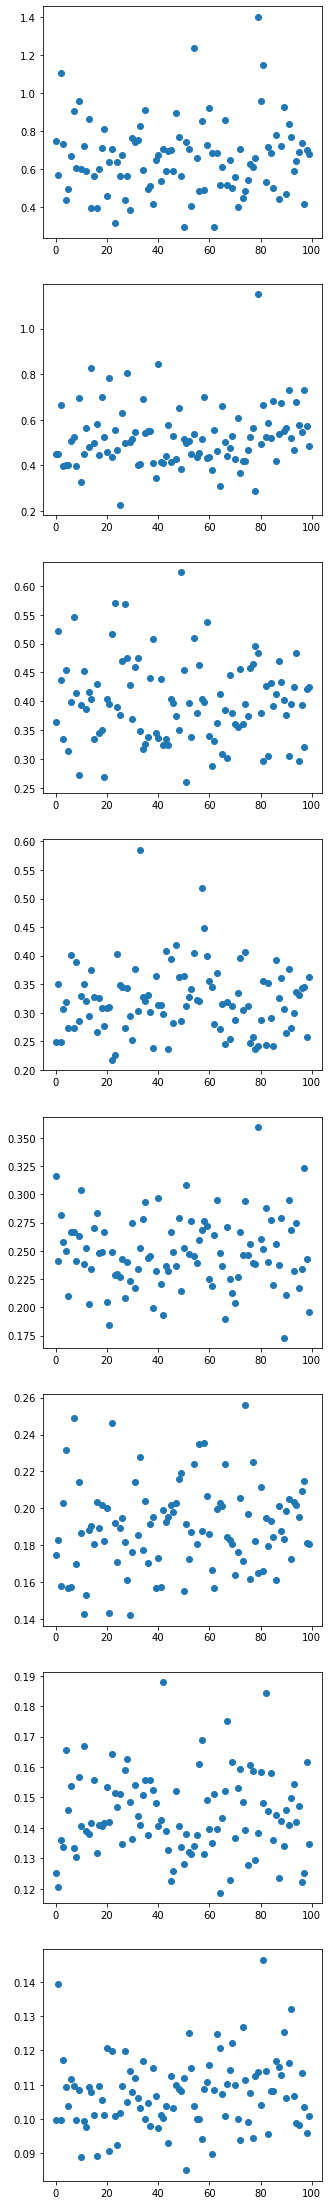

In [634]:
f, axes = plt.subplots(8,1, figsize=(5,5*8))
for i in range(len(spectral_radius_lists)):
    axes[i].plot(range(100), spectral_radius_lists[i],'o')

# 그리고 또한, m by m matrix에서 m이 커질수록,
# spectral radius가 점점 줄어든다는 것을 관찰할 수 있다.

In [635]:
# [(d-b)]
m_list = [8*(2**i) for i in range(8)]
norm_lists = []
spectral_radius_lists = []
for m in tqdm(m_list):
    norm_list = []
    spectral_radius_list = []
    for j in range(100):
        A = np.triu(np.random.randn(m,m)/np.sqrt(m))
        eigvals = np.linalg.eigvals(A)       
        spectral_radius_list.append(max(np.abs(eigvals)))
        norm_list.append(np.linalg.norm(A,2))
    norm_lists.append(norm_list)
    spectral_radius_lists.append(spectral_radius_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:38<00:00, 12.33s/it]


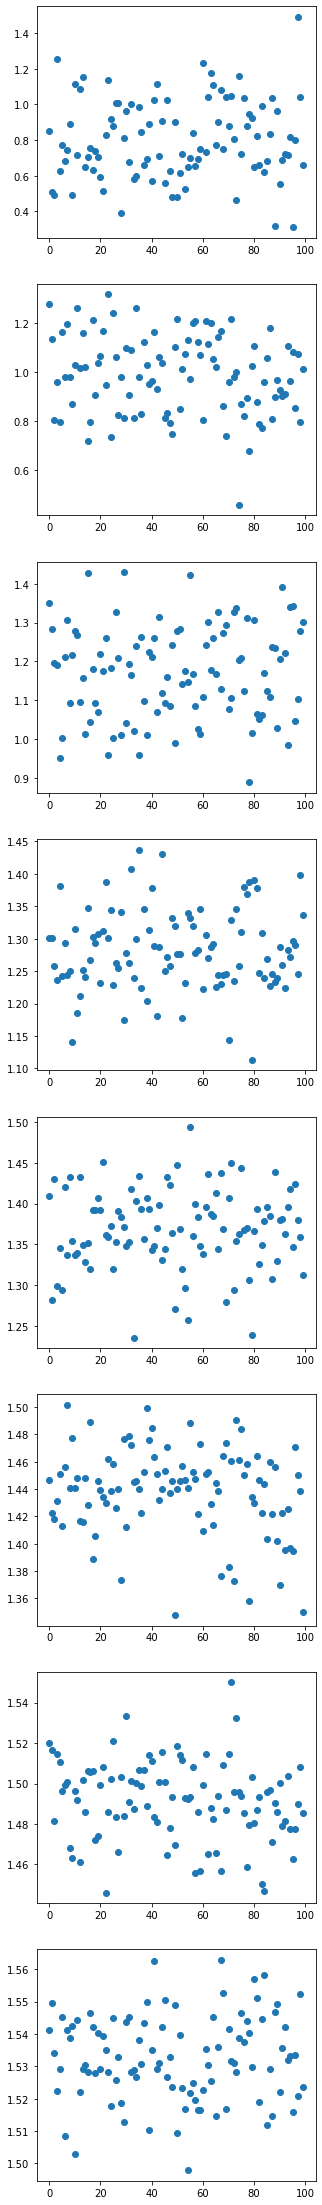

In [636]:
f, axes = plt.subplots(8,1, figsize=(5,5*8))
for i in range(len(norm_lists)):
    norm_list = norm_lists[i]
    spectral_radius_list = spectral_radius_lists[i]
    norm_minus_radius_list = [norm_list[j]-spectral_radius_list[j] for j in range(100)]
    axes[i].plot(range(100), norm_minus_radius_list,'o')
    
# 마찬가지로, m이 커진다고해서 norm과 spectral radius의 차이가 줄어드는 경향이
# 보이지 않으므로, inequality가 equality로 approach한다고 볼 수 없을 것이다.

In [637]:
#[(d-c)]
m_list = [8*(2**i) for i in range(8)]
min_sv_lists = []
for m in tqdm(m_list):
    min_sv_list = []
    for j in range(100):
        A = np.triu(np.random.randn(m,m)/np.sqrt(m))
        min_sv = min(svdvals(A))
        min_sv_list.append(min_sv)
    min_sv_lists.append(min_sv_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:35<00:00, 11.98s/it]


In [638]:
proportion_lists = []
for i in range(len(min_sv_lists)):
    m = 8*(2**i)
    criteria_list = [2**(-j) for j in range(1,15)]
    min_sv_list = min_sv_lists[i]
    proportion_list = []
    for criteria in criteria_list:
        proportion = get_proportion_below_val(min_sv_list, criteria)
        proportion_list.append(proportion)
        print('proportion of min singular value below {} of {} by {} matrix : {}'.\
             format(criteria, m, m, proportion))
    proportion_lists.append(proportion_list)
    print('-'*50)

proportion of min singular value below 0.5 of 8 by 8 matrix : 1.0
proportion of min singular value below 0.25 of 8 by 8 matrix : 1.0
proportion of min singular value below 0.125 of 8 by 8 matrix : 0.99
proportion of min singular value below 0.0625 of 8 by 8 matrix : 0.99
proportion of min singular value below 0.03125 of 8 by 8 matrix : 0.99
proportion of min singular value below 0.015625 of 8 by 8 matrix : 0.94
proportion of min singular value below 0.0078125 of 8 by 8 matrix : 0.83
proportion of min singular value below 0.00390625 of 8 by 8 matrix : 0.71
proportion of min singular value below 0.001953125 of 8 by 8 matrix : 0.56
proportion of min singular value below 0.0009765625 of 8 by 8 matrix : 0.38
proportion of min singular value below 0.00048828125 of 8 by 8 matrix : 0.29
proportion of min singular value below 0.000244140625 of 8 by 8 matrix : 0.24
proportion of min singular value below 0.0001220703125 of 8 by 8 matrix : 0.15
proportion of min singular value below 6.103515625e-0

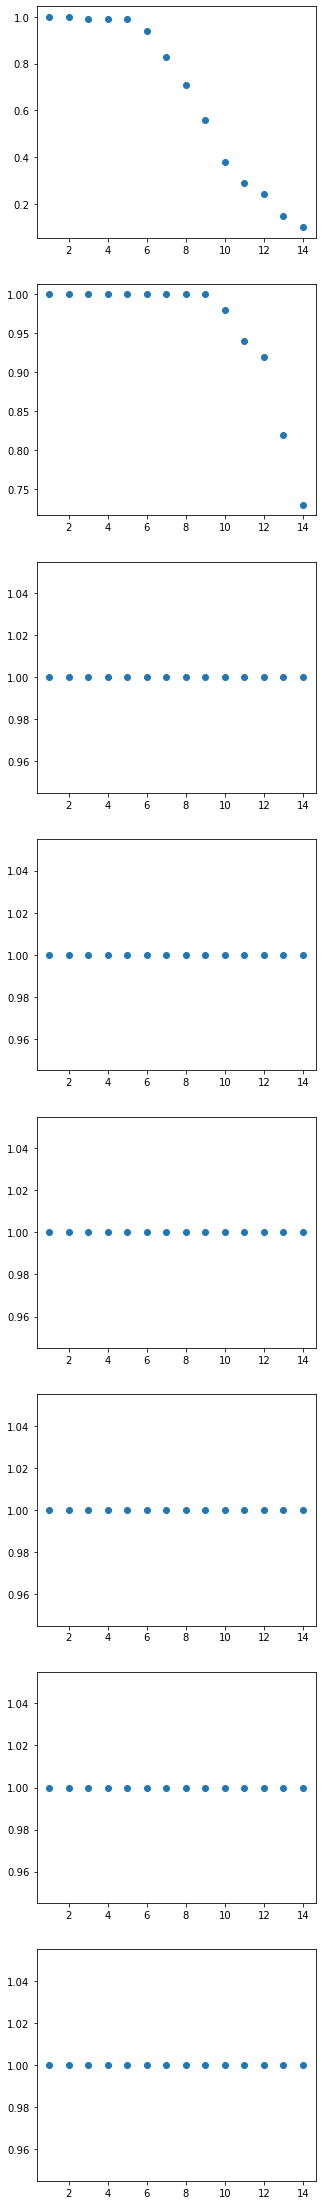

In [639]:
f, axes = plt.subplots(8,1, figsize=(5,8*5))
for i in range(len(proportion_lists)):
    axes[i].plot(range(1,15), proportion_lists[i],'o')
    
# full matrices일 때와 마찬가지의 결과를 얻는다고 볼 수 있다.
# 다만 m이 커질수록, 1/(2**n)보다 작은 minimum singular value의 비율이
# full matrices일 때보다 훨씬 더 빠르게 증가한다고 볼 수 있을 것이다.

# 연습문제 4.6

In [363]:
# 연습문제 4.6
m = 50
n = 12
t = np.linspace(0,1,50)
A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])

In [461]:
#[(a)]
# normal equation : np.dot(np.dot(A.T, A),x) = np.dot(A.T, b.reshape(-1,1))
A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])
# x_a = np.linalg.solve(np.dot(A.T,A), np.dot(A.T,b.reshape(-1,1)))
x_a,_,_,_ = np.linalg.lstsq(A, b)
x_a = x_a.reshape(-1,1)
print(x_a)

[[ 1.00000000e+00]
 [-4.22743385e-07]
 [-7.99998124e+00]
 [-3.18763318e-04]
 [ 1.06694308e+01]
 [-1.38202899e-02]
 [-5.64707562e+00]
 [-7.53160319e-02]
 [ 1.69360697e+00]
 [ 6.03210333e-03]
 [-3.74241701e-01]
 [ 8.80405757e-02]]


C:\Users\DELL\Anaconda3\envs\tensorflow_tutorial\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [462]:
#[(b)]
def back_substitute(U, b):
    #upper trianular matrix인 U에 대해 Ux = b를 만족하는 x를 찾는 후진대입법
    b = b.reshape(-1)
    n = len(b)
    x = np.zeros_like(b)
    
    assert U[n-1,n-1] != 0
    
    x[n-1] = b[n-1]/U[n-1,n-1]
    for i in range(n-1)[::-1]:
        sub = 0
        for j in range(i+1,n):
            sub += U[i,j] * x[j]
        x[i] = (b[i] - sub)/U[i,i]
    x = x.reshape(-1,1)
    
    return x

A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])
Q,R = mgs(A)
x_b = back_substitute(R, np.dot(Q.T,b.reshape(-1,1)))
print(x_b)

[[ 1.00000000e+00]
 [-4.58240105e-07]
 [-7.99998009e+00]
 [-3.33437814e-04]
 [ 1.06695290e+01]
 [-1.42085086e-02]
 [-5.64611093e+00]
 [-7.68632224e-02]
 [ 1.69520470e+00]
 [ 5.00761554e-03]
 [-3.73871301e-01]
 [ 8.79830113e-02]]


In [448]:
#[(c)]
A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])
V,R = qrhouse(A)
Q = formQ(V)
Q = Q[:,:n]
x_c = back_substitute(R, np.dot(Q.T,b.reshape(-1,1)))
print(x_c)

[[ 1.00000000e+00]
 [-4.22743177e-07]
 [-7.99998124e+00]
 [-3.18763295e-04]
 [ 1.06694308e+01]
 [-1.38202895e-02]
 [-5.64707562e+00]
 [-7.53160301e-02]
 [ 1.69360697e+00]
 [ 6.03210493e-03]
 [-3.74241702e-01]
 [ 8.80405758e-02]]


In [449]:
#[(d)]
A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])
Q, R = np.linalg.qr(A)
x_d = back_substitute(R, np.dot(Q.T,b.reshape(-1,1)))
print(x_d)

[[ 1.00000000e+00]
 [-4.22743382e-07]
 [-7.99998124e+00]
 [-3.18763322e-04]
 [ 1.06694308e+01]
 [-1.38202901e-02]
 [-5.64707562e+00]
 [-7.53160326e-02]
 [ 1.69360697e+00]
 [ 6.03210277e-03]
 [-3.74241701e-01]
 [ 8.80405757e-02]]


In [471]:
#[(e)]
# 생략

In [458]:
#[(f)]
A = np.fliplr(np.vander(t,n))
b = np.array([np.cos(4*v) for v in t])
U, s, Vh = svd(A)
S = np.zeros((n,m))
for i in range(min(n,m)):
    S[i,i] = 1/s[i]
pseudo_inv = np.dot(np.dot(Vh.T,S),U.T)
x_f = np.dot(pseudo_inv, b.reshape(-1,1))
print(x_f)

[[ 1.00000000e+00]
 [-4.22743378e-07]
 [-7.99998124e+00]
 [-3.18763307e-04]
 [ 1.06694308e+01]
 [-1.38202899e-02]
 [-5.64707562e+00]
 [-7.53160322e-02]
 [ 1.69360697e+00]
 [ 6.03210216e-03]
 [-3.74241701e-01]
 [ 8.80405757e-02]]


In [648]:
# [(g)]
coeff_lists = [x_b, x_c, x_d, x_f]
wrong_digit_lists = []
for ix in range(len(x_b)):
    print('%d번째 계수'%ix)
    print('%0.15f'%x_a[ix],'  <-- 정답')
    for coeff_list in coeff_lists:
        print('%0.15f'%coeff_list[ix])
        
        
# 아래는 순서대로 x_a, x_b, x_c, x_d, x_f 의 값이다.
# 아래의 프린트문 결과를 살펴보면
# x_b, 즉 modified Gram-Schmidt 방법이 언제나 가장 먼저 오류를 발생시켰다.
# 그 다음으로는 x_c가 오류를 더 빨리 보이는 경향을 관찰할 수 있고,
# 그 다음으로는 x_d나 x_e 나 거의 동시에 오류를 보였다.
# 소수점 아래 8~13번째 자리에서 오차를 보이는 경향이 두드러지므로,
# 약간 불안정하다고 생각해볼 수 있을 것이다.

0번째 계수
1.000000000996612   <-- 정답
1.000000001155032
1.000000000996603
1.000000000996611
1.000000000996611
1번째 계수
-0.000000422743385   <-- 정답
-0.000000458240105
-0.000000422743177
-0.000000422743382
-0.000000422743378
2번째 계수
-7.999981235677660   <-- 정답
-7.999980090908921
-7.999981235680500
-7.999981235677447
-7.999981235677922
3번째 계수
-0.000318763317686   <-- 정답
-0.000333437813881
-0.000318763295426
-0.000318763321786
-0.000318763307405
4번째 계수
10.669430796415446   <-- 정답
10.669529000523193
10.669430796301070
10.669430796448829
10.669430796438974
5번째 계수
-0.013820289920804   <-- 정답
-0.014208508596200
-0.013820289512555
-0.013820290071299
-0.013820289896103
6번째 계수
-5.647075622661365   <-- 정답
-5.646110928370130
-5.647075623687262
-5.647075622247518
-5.647075621993281
7번째 계수
-0.075316031877558   <-- 정답
-0.076863222412218
-0.075316030083697
-0.075316032601202
-0.075316032161936
8번째 계수
1.693606971519340   <-- 정답
1.695204699446828
1.693606969400883
1.693606972329135
1.693606971413828
9번째 계수
0.00